In [1]:
from IPython.display import Image, display

# Espaço vetorial

* A detecção de palavras no contexto de NLP é util para tarefas como obter estatísticas sobre o uso de palavras ou fazer pesquisas de palvra-chave.

* Isso fará que um detector de spam seja menos propenso a se enganar com uma única palavra.

* Ou até mesmo pode avaliar o quão positivo um tweet é quando há uma ampla variedade de palavras com vários graus de pontuação de "positividade"

* A frequência com que essas palavras aparecem em um documento em relação ao restante dos documentos pode ser usada para refinar ainda mais a "positividade" do documento.

* A ideia aqui é estudar medidas mais diferenciadas e seu uso em um documento.

* A abordagem que analisaremos aqui tem sido a base para a geração de recursos da linguagem natural para mecanismos de busca comercial e filtros de spam por décadas.

* A técnica de tokenização transforma palavras em números inteiros por represetar a ocorrência de cada palavra em um documento (vetores binarios).

* A ideia agora e representar as palavras em um espaço contínuo.

* Iremos analisar três técnicas de representar palavras e sua importância em um documento.

    * Bag of words: vetores de frequência de palavras.

    * Bag of n-grams: Contagem de pares (n) de palavras.

    * TF-IDF vectors: pontuação da palavra que melhor representa sua importância.
    

* Assumimos que, **quanto mais vezes uma palavra ocorre no documento, maior deve ser o significado da palavra para o documento**.

In [2]:
from nltk.tokenize import TreebankWordTokenizer
from collections import Counter

In [3]:
sentence = "The faster Harry got to the store, the faster Harry, the faster, would get home."

tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(sentence.lower())
print(tokens)

['the', 'faster', 'harry', 'got', 'to', 'the', 'store', ',', 'the', 'faster', 'harry', ',', 'the', 'faster', ',', 'would', 'get', 'home', '.']


In [4]:
bag_of_words = Counter(tokens)
print(bag_of_words)

Counter({'the': 4, 'faster': 3, ',': 3, 'harry': 2, 'got': 1, 'to': 1, 'store': 1, 'would': 1, 'get': 1, 'home': 1, '.': 1})


In [5]:
bag_of_words_most_common = bag_of_words.most_common(4)
print(bag_of_words_most_common)

[('the', 4), ('faster', 3), (',', 3), ('harry', 2)]


In [6]:
times_harry_appers = bag_of_words['harry']
print(times_harry_appers)

2


* Para documentos pequenos como este, a lista não ordenada de palavras pode conter muitas informações sobre a inteção original da frase.

* E estas informações são suficientes para, por exemplo, detectar spam, calcular sentimentos e até detectar sarcasmo.

* Este número de vezes em que uma palavra aparece em um documento é chamado (em inglês) de **term frequency** (TF).

* Se normalizado, ela sera dividido pelo número de termos no documento (que será no máximo 1, se todas as palavras do documento forem iguais).

* A normalização é importante porque, dependendo do tamanho do documento, uma palavra aparecr 100 vezes pode indicar muita relevância para um documento de 1000 (0.1) palavras ou indicar baixa relevância para um documento de 1000000 (0.001).

* Assim, para cada palavra podemos calcular a importância relativa do documento neste termo.

* Assim, obtemos os 4 principais termos daquele documento.

* Sendo que termos como "the" e pontuações não são muito úteis para o documento e serão descartados (stop words).

* Agora vamos calcular o TF da palavra "harry"

In [7]:
unique_words = len(bag_of_words)
tf = times_harry_appers / unique_words
print(round(tf ,4))

0.1818


* Vamos utilizar um texto maior da wikipédia sobre pipas (kite_text da biblioteca "nlpia").

In [8]:
# http://go.microsoft.com/fwlink/?LinkId=691126&fixForIE=.exe
# !pip install nlpia --upgrade

In [9]:
from collections import Counter
from nltk.tokenize import TreebankWordTokenizer
from nlpia.data.loaders import kite_text

INFO:nlpia.constants:Starting logger in nlpia.constants...
INFO:nlpia.loaders:No BIGDATA index found in C:\Users\angel\anaconda3\lib\site-packages\nlpia\data\bigdata_info.csv so copy C:\Users\angel\anaconda3\lib\site-packages\nlpia\data\bigdata_info.latest.csv to C:\Users\angel\anaconda3\lib\site-packages\nlpia\data\bigdata_info.csv if you want to "freeze" it.
INFO:nlpia.futil:Reading CSV with `read_csv(*('C:\\Users\\angel\\anaconda3\\lib\\site-packages\\nlpia\\data\\mavis-batey-greetings.csv',), **{'low_memory': False})`...
INFO:nlpia.futil:Reading CSV with `read_csv(*('C:\\Users\\angel\\anaconda3\\lib\\site-packages\\nlpia\\data\\sms-spam.csv',), **{'low_memory': False})`...


In [10]:
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(kite_text.lower())
tokens_counts = Counter(tokens)
print(tokens_counts)

Counter({'the': 26, 'a': 20, 'kite': 16, ',': 15, 'and': 10, 'of': 10, 'kites': 8, 'is': 7, 'in': 7, 'or': 6, 'wing': 5, 'to': 5, 'be': 5, 'as': 5, 'lift': 4, 'have': 4, 'may': 4, 'at': 3, 'so': 3, 'can': 3, 'also': 3, 'kiting': 3, 'are': 3, 'flown': 3, 'tethered': 2, 'craft': 2, 'with': 2, 'that': 2, 'air': 2, 'consists': 2, 'tethers': 2, 'anchors.': 2, 'often': 2, 'bridle': 2, 'wind': 2, "'s": 2, 'designed': 2, ';': 2, 'when': 2, 'for': 2, 'moving': 2, 'technical': 2, 'even': 2, 'called': 2, 'surface': 2, 'pressure': 2, 'drag': 2, 'force': 2, 'by': 2, 'which': 2, '.': 2, 'used': 2, 'power': 2, 'traditionally': 1, 'heavier-than-air': 1, 'surfaces': 1, 'react': 1, 'against': 1, 'create': 1, 'drag.': 1, 'wings': 1, 'guide': 1, 'face': 1, 'correct': 1, 'angle': 1, 'it.': 1, 'not': 1, 'needed': 1, 'sailplane': 1, 'launch': 1, 'tether': 1, 'meets': 1, 'single': 1, 'point.': 1, 'fixed': 1, 'untraditionally': 1, 'tether-set-coupled': 1, 'sets': 1, 'though': 1, 'system': 1, 'still': 1, 'kite.

In [11]:
from nltk.tokenize import TreebankWordTokenizer
from nlpia.data.loaders import kite_text
import nltk
from collections import Counter

tokenizer = TreebankWordTokenizer()

tokens = tokenizer.tokenize(kite_text.lower())
tokens_counts = Counter(tokens)

nltk.download('stopwords', quiet=True)
stopwords = nltk.corpus.stopwords.words('english')

tokens = [x for x in tokens if x not in stopwords]
kite_couts = Counter(tokens)
print(kite_couts)

Counter({'kite': 16, ',': 15, 'kites': 8, 'wing': 5, 'lift': 4, 'may': 4, 'also': 3, 'kiting': 3, 'flown': 3, 'tethered': 2, 'craft': 2, 'air': 2, 'consists': 2, 'tethers': 2, 'anchors.': 2, 'often': 2, 'bridle': 2, 'wind': 2, "'s": 2, 'designed': 2, ';': 2, 'moving': 2, 'technical': 2, 'even': 2, 'called': 2, 'surface': 2, 'pressure': 2, 'drag': 2, 'force': 2, '.': 2, 'used': 2, 'power': 2, 'traditionally': 1, 'heavier-than-air': 1, 'surfaces': 1, 'react': 1, 'create': 1, 'drag.': 1, 'wings': 1, 'guide': 1, 'face': 1, 'correct': 1, 'angle': 1, 'it.': 1, 'needed': 1, 'sailplane': 1, 'launch': 1, 'tether': 1, 'meets': 1, 'single': 1, 'point.': 1, 'fixed': 1, 'untraditionally': 1, 'tether-set-coupled': 1, 'sets': 1, 'though': 1, 'system': 1, 'still': 1, 'kite.': 1, 'sustains': 1, 'flight': 1, 'generated': 1, 'flows': 1, 'around': 1, 'producing': 1, 'low': 1, 'high': 1, 'wings.': 1, 'interaction': 1, 'generates': 1, 'horizontal': 1, 'along': 1, 'direction': 1, 'wind.': 1, 'resultant': 1, 

## Vetorização

* Agora, ao invés de manter a descrição do documento com um dicionário de frequência, vamos produzir um vetor dessa contagem de palavras.

In [12]:
document_vector = []
doc_len = len(tokens)

for key, value in kite_couts.most_common():
    document_vector.append(value / doc_len)

print(document_vector)
print()
print(sum(document_vector))

[0.07207207207207207, 0.06756756756756757, 0.036036036036036036, 0.02252252252252252, 0.018018018018018018, 0.018018018018018018, 0.013513513513513514, 0.013513513513513514, 0.013513513513513514, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.009009009009009009, 0.0045045045045045045, 0.0045045045045045045, 0.0045045045045045045, 0.0045045045045045045, 0.0045045045045045045, 0.0045045045045045045, 0.0045045045045045045, 0.0045045045045045045, 0.0045045045045045045, 0.0045045045045045045, 0.0045045045045045045, 0.0045045045045045045, 0.0045045045045045045,

* Cada dimensão deste vetor é o TF (term frequency) normalizado de cada palavra neste (específico) documento.

* Mas observe que, como estamos tratando de apenas um único documento, todas as posições correspondem às palavras que aparecem no documento.

* Normalmente, com vários documentos, como que noso vetor se comporta ?

* Para comparar vários documento, precisamos que todos tenham vetores do mesmo tamanho (dimensão), sendo que o valor desta dimentsão é a quantidade total de palavras do vocabulário.

In [13]:
from nltk.tokenize import TreebankWordTokenizer
from collections import Counter

tokenizer = TreebankWordTokenizer()
docs = ['The faster Harry go to the store, the faster and faster Harry would get home.']
docs.append('Harry is hairy and faster than Jill.')
docs.append('Jill is not as hairy as Harry.')

doc_tokes = []

for doc in docs:
    doc_tokes += [sorted(tokenizer.tokenize(doc.lower()))]

print(len(doc_tokes))

3


In [14]:
doc_tokes

[[',',
  '.',
  'and',
  'faster',
  'faster',
  'faster',
  'get',
  'go',
  'harry',
  'harry',
  'home',
  'store',
  'the',
  'the',
  'the',
  'to',
  'would'],
 ['.', 'and', 'faster', 'hairy', 'harry', 'is', 'jill', 'than'],
 ['.', 'as', 'as', 'hairy', 'harry', 'is', 'jill', 'not']]

In [15]:
all_doc_tokens = sum(doc_tokes, [])

In [16]:
print(len(all_doc_tokens))

33


In [17]:
lexicon = sorted(set(all_doc_tokens))
print(len(lexicon))

18


In [18]:
from collections import OrderedDict
zero_vector = OrderedDict((token, 0) for token in lexicon)
zero_vector

OrderedDict([(',', 0),
             ('.', 0),
             ('and', 0),
             ('as', 0),
             ('faster', 0),
             ('get', 0),
             ('go', 0),
             ('hairy', 0),
             ('harry', 0),
             ('home', 0),
             ('is', 0),
             ('jill', 0),
             ('not', 0),
             ('store', 0),
             ('than', 0),
             ('the', 0),
             ('to', 0),
             ('would', 0)])

In [19]:
import copy

doc_vector = []
for doc in docs:
    vec = copy.copy(zero_vector)
    tokens = tokenizer.tokenize(doc.lower())
    tokens_count = Counter(tokens)
    for key, valu in tokens_count.items():
        vec[key] = valu / len(lexicon)
    doc_vector.append(dict(vec))

In [20]:
print(len(doc_vector))
print(doc_vector[0])

3
{',': 0.05555555555555555, '.': 0.05555555555555555, 'and': 0.05555555555555555, 'as': 0, 'faster': 0.16666666666666666, 'get': 0.05555555555555555, 'go': 0.05555555555555555, 'hairy': 0, 'harry': 0.1111111111111111, 'home': 0.05555555555555555, 'is': 0, 'jill': 0, 'not': 0, 'store': 0.05555555555555555, 'than': 0, 'the': 0.16666666666666666, 'to': 0.05555555555555555, 'would': 0.05555555555555555}


### Espaço vetorial

* Estes vetores que calculamos para cada documento são coordenadas em um espaço vetorial. Eles descrevem um local ou posição neste espaço.

* Um espaço é a coleção de todos os vetores (documentos) possíveis que podem aparecer nesse espaço.

* Portanto, um vetor com dois valores estaria em um espaço vetorial 2D, um vetor com três no espaço vetorial 3D e assim por diante.

* Mas podemos representar mais do que 2 ou 3 dimensões em um espaço vetorial (apenas de não ser possível representar graficamente).

* O número de dimensões dos nossos vetores será o número de palavras no léxico (vocabulário, definido pela letra k), ou seja, podemos ter milhares de dimensões.

* Um dos problemas em representar vetores com grander dimensões é a necessidade de maior poder computacional para as operações sobre estes vetores.

* Além disso, a maldição da dimensionalidade é um problema, pois em espaços de muitas dimensões, todos os vetores tender a ficar equidistantes. Isso dificulta muito o cálculo de distância (Euclidean distance) entre eles.

* Então, agora que temos os vetores para cada documentos, podemos medir a distância entre eles.

* No espaço vetorial, dois vetores são similares se compartilham direções similares (aproximadamente o mesmo comprimento).

* Nossos objetivos é encontrar documentos que usam as mesmas palavras em uma proporção semelhante.

* Uma das métricas que podemos utilizar é a **distância do cosseno**. Ou seja, é o cosseno do ângulo entre dois vetores (valores de -1 a +1).

$A . B = \vert A \vert \vert B \vert . \cos \Theta$

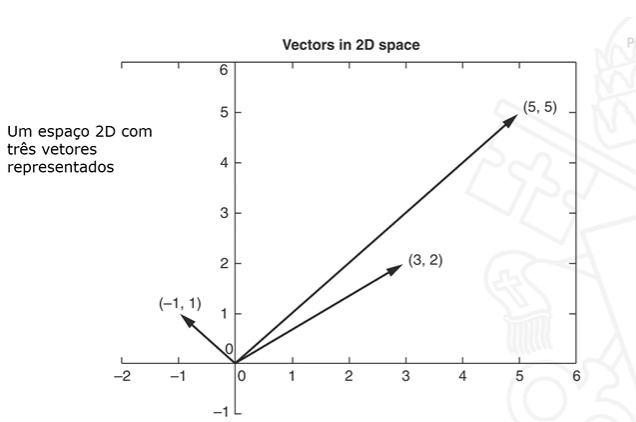

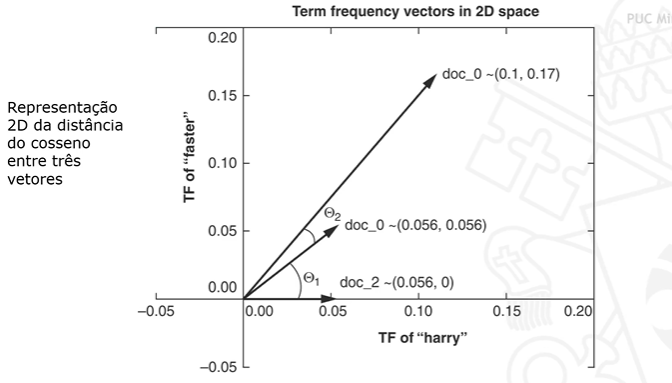

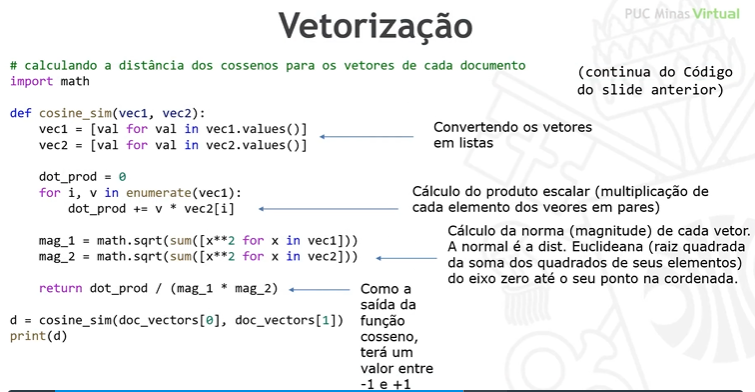

In [21]:
display(Image('Imagens/Imagem0001.png'), Image('Imagens/Imagem0002.png'), Image('Imagens/Imagem0003.png'))

$A . B = \frac{\sum^{i=0}_{i..n} (A_i . B_i)}{(\sqrt{\sum^{i=0}_{i..n} (A_{i}^2})) . (\sqrt{\sum^{i=0}_{i..n} (B_{i}^2}))}$

In [22]:
import math

def cosine_similarity(vec1, vec2):
    vec1 = [val for val in vec1.values()]
    vec2 = [val for val in vec2.values()]

    dot_prod = 0
    for i, v in enumerate(vec1):
        dot_prod += v * vec2[i]

    mag_1 = math.sqrt(sum([x ** 2 for x in vec1])) 
    mag_2 = math.sqrt(sum([x ** 2 for x in vec2])) 

    return dot_prod / (mag_1 * mag_2)

In [23]:
cosine_similarity(doc_vector[0], doc_vector[1])

0.4445004445006667

* O valor retornado pela função do cosseno do ângulo entre dos dois vetores.

* Quanto mais próximo o valor de similaridade do cosseno for 1, maais próximos os dois vetores estão do ângulo.

* Para vetores de documentos de linguagem natural que têm uma similaridade do cosseno próximo a 1, significa que os documentos estão usando palavras semelhantes em proporção semelhante.

## TF-IDF

* A contagem de palavras, apesar de útil, ainda não informa muito sobre a importância dessa palavra naquele doducmento em relação ao restante dos documentos do corpus (coleção de documentos)

* Vamos analisar o IDF (Inverse Document Frequency). Para calcular esta medida, vamos contar tokens e agrupá-los de duas maneiras:

    * Por documento e em todo o corpus.

    

In [24]:
from nlpia.data.loaders import kite_history, kite_text
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

kite_intro = kite_text.lower()
intro_tokens = tokenizer.tokenize(kite_intro)

kite_history = kite_history.lower()
history_tokens = tokenizer.tokenize(kite_history)

intro_total = len(intro_tokens)
print(intro_total)

history_total = len(history_tokens)
print(history_total)



363
297


In [28]:
from collections import Counter

intro_tf = {}
history_tf = {}

intro_counts = Counter(intro_tokens)
intro_tf['kite'] = intro_counts['kite'] / intro_total

history_counts = Counter(history_tokens)
history_tf['kite'] = history_counts['kite'] / history_total

print(f'Frequencia dos termos de "kite" em intro é: {intro_tf["kite"]:.4f}')

print(f'Frequencia dos termos de "kite" em history é: {history_tf["kite"]:.4f}')

Frequencia dos termos de "kite" em intro é: 0.0441
Frequencia dos termos de "kite" em history é: 0.0202


Ao analisar o resultado vimos um número duas vezes maior do que o outro.

* A palavra "kite" é das vezes mais relevante na seção de "intro" ? Não é!

* A ideia da frequência inversa (IDF): Quão estranho é esse token neste documento ? Se um termo aparece em um documento várias vezes, mas ocorre raramente no restante do corpus, pode-se supor que seja importante para este documento especificamente.

* O IDF de um termo é a proporção do: (n) número total de documentos para o (m) número de documentos em que o termo aparece (n/m).

In [29]:
num_docs_contain_kite = 0

for doc in [intro_tokens, history_tokens]:
    if 'kite' in doc:
        num_docs_contain_kite += 1


num_docs_contain_china = 0

for doc in [intro_tokens, history_tokens]:
    if 'china' in doc:
        num_docs_contain_china += 1

intro_tf['china'] = intro_counts['china'] / intro_total
history_tf['china'] = history_counts['china'] / history_total


print(f'Frequencia dos termos de "china" em intro é: {intro_tf["china"]:.4f}')

print(f'Frequencia dos termos de "china" em history é: {history_tf["china"]:.4f}')

Frequencia dos termos de "china" em intro é: 0.0000
Frequencia dos termos de "china" em history é: 0.0101


In [31]:
num_docs = 2
intro_idf = {}
history_idf = {}

intro_idf['kite'] = num_docs / num_docs_contain_kite
history_idf['kite'] = num_docs / num_docs_contain_kite

intro_idf['china'] = num_docs / num_docs_contain_china
history_idf['china'] = num_docs / num_docs_contain_china

print(intro_idf['kite'], history_idf['kite'])
print(intro_idf['china'], history_idf['china'])

1.0 1.0
2.0 2.0


In [33]:
intro_dfidf = {}
intro_dfidf['kite'] = intro_tf['kite'] * intro_idf['kite']
intro_dfidf['china'] = intro_tf['china'] * intro_idf['china']

history_dfidf = {}
history_dfidf['kite'] = history_tf['kite'] * history_idf['kite']
history_dfidf['china'] = history_tf['china'] * history_idf['china']

print(intro_dfidf['kite'], history_dfidf['kite'])
print(history_dfidf['china'], history_dfidf['china'])

0.0440771349862259 0.020202020202020204
0.020202020202020204 0.020202020202020204


* O IDF é muito útil, pois se pensarmos em um corpus de 1000 documentos e se a palavra ocorresse em todos (ou quase todos) os documentos, o valor de se IDF seria próximo de 1.

* Uma palavra mais rara, teria o IDF mais próximo de 1000.

* Observe que temos uma forma de penalizar palavras que ocorrem em quase todos os documentos, e portanto, ajudam muito pouco a discriminar um documento do outro.

* Assim, a métrica TF-IDF leva em consideração tanto a frequência de ocorrência de um termo em um documento bem como a frequência de ocorrência do termo em todos os documentos ( o quão raro um termo é).

* Ou seja, quanto mais vezes uma palavra aparecer no documento, o RF (e, portanto, o TF-IDF) aumentará.

* Ao passo que, à medida que o númeo de documentos que contêm essa palavra aumenta, o IDF (e, portanto, o TF-IDF) dessa palavra diminuirá.

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

corpus = docs
vecorizer = TfidfVectorizer(min_df=1)
model = vecorizer.fit_transform(corpus)

print(model.todense().round(2))

[[0.16 0.   0.48 0.21 0.21 0.   0.25 0.21 0.   0.   0.   0.21 0.   0.64
  0.21 0.21]
 [0.37 0.   0.37 0.   0.   0.37 0.29 0.   0.37 0.37 0.   0.   0.49 0.
  0.   0.  ]
 [0.   0.75 0.   0.   0.   0.29 0.22 0.   0.29 0.29 0.38 0.   0.   0.
  0.   0.  ]]
